# Imports

In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns 

# check the version of these modules
print(np.__version__)
print(pickle.format_version)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

1.23.4
4.0


# Loading data 

In [2]:
# load DE features named '1_123.npz'
data_npz = np.load('../EEG_initial_exploration/data/1_123.npz')
print(data_npz.files)

['data', 'label']


In [3]:
# get data and label
# ** both 'data' and 'label' are pickled dict **

data = pickle.loads(data_npz['data'])
label = pickle.loads(data_npz['label'])

label_dict = {0:'Disgust', 1:'Fear', 2:'Sad', 3:'Neutral', 4:'Happy'}

print(data.keys())
print(label.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])


In [4]:
# As we can see, there are 45 keys in both 'data' and 'label'.
# Each participant took part in our experiments for 3 sessions, and he/she watched 15 movie clips (i.e. 15 trials) during each session.
# Therefore, we could extract 3 * 15 = 45 DE feature matrices.

# The key indexes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] belong to Session 1.
# The key indexes [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] belong to Session 2.
# The key indexes [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44] belong to Session 3.

# We will print the emotion labels for each trial.
label_dict = {0:'Disgust', 1:'Fear', 2:'Sad', 3:'Neutral', 4:'Happy'}
for i in range(45):
    print('Session {} -- Trial {} -- EmotionLabel : {}'.format(i//15+1, i%15+1, label_dict[label[i][0]]))

Session 1 -- Trial 1 -- EmotionLabel : Happy
Session 1 -- Trial 2 -- EmotionLabel : Fear
Session 1 -- Trial 3 -- EmotionLabel : Neutral
Session 1 -- Trial 4 -- EmotionLabel : Sad
Session 1 -- Trial 5 -- EmotionLabel : Disgust
Session 1 -- Trial 6 -- EmotionLabel : Happy
Session 1 -- Trial 7 -- EmotionLabel : Fear
Session 1 -- Trial 8 -- EmotionLabel : Neutral
Session 1 -- Trial 9 -- EmotionLabel : Sad
Session 1 -- Trial 10 -- EmotionLabel : Disgust
Session 1 -- Trial 11 -- EmotionLabel : Happy
Session 1 -- Trial 12 -- EmotionLabel : Fear
Session 1 -- Trial 13 -- EmotionLabel : Neutral
Session 1 -- Trial 14 -- EmotionLabel : Sad
Session 1 -- Trial 15 -- EmotionLabel : Disgust
Session 2 -- Trial 1 -- EmotionLabel : Sad
Session 2 -- Trial 2 -- EmotionLabel : Fear
Session 2 -- Trial 3 -- EmotionLabel : Neutral
Session 2 -- Trial 4 -- EmotionLabel : Disgust
Session 2 -- Trial 5 -- EmotionLabel : Happy
Session 2 -- Trial 6 -- EmotionLabel : Happy
Session 2 -- Trial 7 -- EmotionLabel : Disgus

# Transforming dataset 

## Transform dataset to 2D Data

In [5]:
data

{0: array([[11.08252158,  8.91598993,  7.89408803, ...,  7.07195532,
          5.65708081,  4.36150606],
        [11.08181639,  8.91510401,  7.89364634, ...,  7.07177633,
          5.6569868 ,  4.36162375],
        [11.08113882,  8.91424457,  7.89311581, ...,  7.07146188,
          5.65674597,  4.36177956],
        ...,
        [11.09093681,  8.90651219,  7.88062322, ...,  7.05494398,
          5.64746577,  4.36830008],
        [11.09181965,  8.90597236,  7.87993625, ...,  7.05439539,
          5.64685332,  4.36912144],
        [11.09237631,  8.90556688,  7.87957235, ...,  7.05379577,
          5.64648296,  4.36975357]]),
 1: array([[10.5399661 ,  8.72896013,  7.56788644, ...,  6.64791569,
          5.35431435,  4.0177257 ],
        [10.53897522,  8.72844536,  7.56761172, ...,  6.64782481,
          5.35430551,  4.01779672],
        [10.53676455,  8.72737774,  7.5674892 , ...,  6.64798877,
          5.35445815,  4.01788296],
        ...,
        [10.52582223,  8.72269758,  7.57685102, 

In [6]:
n=1 #no. of movieclip "stimulus" index 0=Happy, 1=Fear
pd.DataFrame(data[n])

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,10.539966,8.728960,7.567886,8.364595,8.554128,10.105816,8.476855,7.210753,7.212286,7.070585,...,8.762342,7.331926,6.510147,5.435035,4.420198,8.961795,7.554606,6.647916,5.354314,4.017726
1,10.538975,8.728445,7.567612,8.364309,8.554022,10.104678,8.476401,7.210501,7.212297,7.070662,...,8.761969,7.331506,6.509971,5.434931,4.420232,8.961679,7.554239,6.647825,5.354306,4.017797
2,10.536765,8.727378,7.567489,8.363710,8.554081,10.102264,8.475524,7.210345,7.212291,7.071066,...,8.761622,7.330959,6.509964,5.434805,4.420261,8.961708,7.553822,6.647989,5.354458,4.017883
3,10.533401,8.725625,7.567234,8.362806,8.554374,10.098756,8.474190,7.210142,7.212044,7.071774,...,8.761360,7.330317,6.509916,5.434762,4.420341,8.961884,7.553214,6.648322,5.354734,4.017978
4,10.529604,8.723575,7.566981,8.361852,8.554828,10.095072,8.473010,7.210065,7.211554,7.072757,...,8.761296,7.329526,6.509850,5.434917,4.420575,8.962340,7.552392,6.648699,5.355166,4.018013
5,10.526214,8.721457,7.566606,8.361039,8.555427,10.092171,8.472033,7.210041,7.211042,7.073871,...,8.761411,7.328751,6.509881,5.435238,4.420959,8.962820,7.551712,6.649132,5.355823,4.018030
6,10.523947,8.719794,7.566344,8.360308,8.556377,10.090361,8.471472,7.210333,7.210609,7.075424,...,8.761569,7.328126,6.510173,5.435795,4.421359,8.963360,7.551158,6.649731,5.356636,4.017984
7,10.522731,8.718626,7.566444,8.359680,8.557584,10.089373,8.471380,7.210992,7.210167,7.077161,...,8.761787,7.327937,6.511055,5.436570,4.421729,8.964072,7.550874,6.650964,5.357586,4.017922
8,10.522409,8.717841,7.566930,8.359000,8.558925,10.089164,8.471617,7.212096,7.209634,7.078889,...,8.762398,7.327830,6.512069,5.437696,4.422110,8.965281,7.550753,6.652553,5.358773,4.017849
9,10.521663,8.716870,7.567474,8.358271,8.560412,10.088743,8.471802,7.213332,7.209112,7.080831,...,8.763135,7.327488,6.513192,5.438787,4.422431,8.966755,7.550586,6.654505,5.359869,4.017712


In [7]:
pd.DataFrame(label[n])

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


<AxesSubplot:>

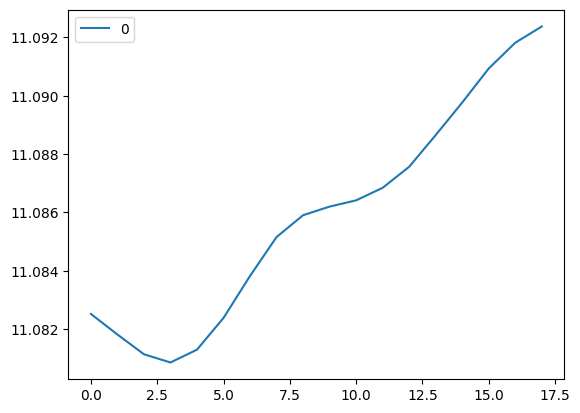

In [8]:
zero=(pd.DataFrame(data[0].T[0]))
zero.plot()

In [9]:
pd.DataFrame(data[0]).shape[0]

18

In [10]:
#Meaning of the observations within a stimulus
#Session 1 start/end seconds

start_second= [30, 132, 287, 555, 773, 982, 1271, 1628, 1730, 2025, 2227, 2435, 2667, 2932, 3204]
end_second= [102, 228, 524, 742, 920, 1240, 1568, 1697, 1994, 2166, 2401, 2607, 2901, 3172, 3359]
duration=[]
min_per_segment=[]
for i in range(15):
    duration.append(end_second[i]-start_second[i])
for i in range(15):
    min_per_segment.append(duration[i]//(pd.DataFrame(data[i]).shape[0]))
#print(duration)
print(min_per_segment)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [11]:
pd.DataFrame(data[0])

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,11.082522,8.915990,7.894088,8.393629,8.576055,10.450283,8.682803,7.425018,6.833982,6.431147,...,8.720063,7.484101,6.889748,5.478040,4.247615,8.838729,7.736448,7.071955,5.657081,4.361506
1,11.081816,8.915104,7.893646,8.393852,8.575908,10.449770,8.681773,7.424501,6.833948,6.430860,...,8.719947,7.483864,6.889452,5.477954,4.247919,8.838477,7.736124,7.071776,5.656987,4.361624
2,11.081139,8.914245,7.893116,8.394334,8.575671,10.449391,8.680753,7.424007,6.834211,6.430407,...,8.719872,7.483311,6.888881,5.477563,4.248155,8.838380,7.735444,7.071462,5.656746,4.361780
3,11.080857,8.913749,7.893061,8.394893,8.575294,10.449425,8.680200,7.424111,6.834612,6.429797,...,8.719701,7.482540,6.887955,5.476832,4.248294,8.838502,7.734421,7.070929,5.656415,4.362126
4,11.081297,8.913816,7.893386,8.395509,8.575009,10.449813,8.680219,7.424706,6.835073,6.429158,...,8.719669,7.481893,6.886515,5.475891,4.248291,8.839146,7.733523,7.069984,5.656045,4.362404
5,11.082385,8.914133,7.893591,8.395986,8.574627,10.450640,8.680702,7.425287,6.835468,6.428375,...,8.719719,7.481358,6.884889,5.474986,4.248107,8.840121,7.732843,7.068976,5.655815,4.362619
6,11.083825,8.914366,7.893565,8.396130,8.573922,10.451684,8.681255,7.425670,6.835498,6.427334,...,8.719999,7.480719,6.883047,5.474118,4.247806,8.841397,7.732290,7.067766,5.655584,4.362830
7,11.085158,8.914192,7.892964,8.395734,8.572777,10.452605,8.681552,7.425420,6.834936,6.425751,...,8.720617,7.480014,6.881331,5.473169,4.247491,8.842948,7.731709,7.066447,5.655036,4.363043
8,11.085906,8.913450,7.891825,8.394749,8.571212,10.452949,8.681341,7.424560,6.833846,6.423801,...,8.721225,7.479337,6.879698,5.472189,4.247235,8.844387,7.731218,7.065100,5.654262,4.363255
9,11.086201,8.911913,7.890041,8.393327,8.569228,10.452640,8.680249,7.422915,6.832204,6.421476,...,8.721410,7.478602,6.877927,5.471179,4.247170,8.845474,7.730684,7.063503,5.653381,4.363512


In [12]:
nbatch=10
test=[i for i in range(45) if i%15-1<nbatch
]

Xtrainframes1 = [pd.DataFrame(data[i]) for i in range(nbatch)]
ytrainframes1 = [pd.DataFrame(label[i]) for i in range(nbatch)]

Xtrainframes2 = [pd.DataFrame(data[i]) for i in range(nbatch)]
ytrainframes2 = [pd.DataFrame(label[i]) for i in range(nbatch)]

Xtrainframes3 = [pd.DataFrame(data[i]) for i in range(nbatch)]
ytrainframes3 = [pd.DataFrame(label[i]) for i in range(nbatch)]

Xtrainframes1
ytrainframes1


[      0
 0   4.0
 1   4.0
 2   4.0
 3   4.0
 4   4.0
 5   4.0
 6   4.0
 7   4.0
 8   4.0
 9   4.0
 10  4.0
 11  4.0
 12  4.0
 13  4.0
 14  4.0
 15  4.0
 16  4.0
 17  4.0,
       0
 0   1.0
 1   1.0
 2   1.0
 3   1.0
 4   1.0
 5   1.0
 6   1.0
 7   1.0
 8   1.0
 9   1.0
 10  1.0
 11  1.0
 12  1.0
 13  1.0
 14  1.0
 15  1.0
 16  1.0
 17  1.0
 18  1.0
 19  1.0
 20  1.0
 21  1.0
 22  1.0
 23  1.0,
       0
 0   3.0
 1   3.0
 2   3.0
 3   3.0
 4   3.0
 5   3.0
 6   3.0
 7   3.0
 8   3.0
 9   3.0
 10  3.0
 11  3.0
 12  3.0
 13  3.0
 14  3.0
 15  3.0
 16  3.0
 17  3.0
 18  3.0
 19  3.0
 20  3.0
 21  3.0
 22  3.0
 23  3.0
 24  3.0
 25  3.0
 26  3.0
 27  3.0
 28  3.0
 29  3.0
 30  3.0
 31  3.0
 32  3.0
 33  3.0
 34  3.0
 35  3.0
 36  3.0
 37  3.0
 38  3.0
 39  3.0
 40  3.0
 41  3.0
 42  3.0
 43  3.0
 44  3.0
 45  3.0
 46  3.0
 47  3.0
 48  3.0
 49  3.0
 50  3.0
 51  3.0
 52  3.0
 53  3.0
 54  3.0
 55  3.0
 56  3.0
 57  3.0
 58  3.0,
       0
 0   2.0
 1   2.0
 2   2.0
 3   2.0
 4   2.0
 5   2.

In [13]:
#train=[i for i in range(45) if i%15-1<nbatch] = [0-9,15-24,30-39]
#test [i for i in range(45) if i%15>nbatch = [10-14, 25-29, 40-44]

Xtrainframes = [pd.DataFrame(data[i]) for i in range(45) if i%15-1<nbatch]
X_train = pd.concat(Xtrainframes)
X_train

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,11.082522,8.915990,7.894088,8.393629,8.576055,10.450283,8.682803,7.425018,6.833982,6.431147,...,8.720063,7.484101,6.889748,5.478040,4.247615,8.838729,7.736448,7.071955,5.657081,4.361506
1,11.081816,8.915104,7.893646,8.393852,8.575908,10.449770,8.681773,7.424501,6.833948,6.430860,...,8.719947,7.483864,6.889452,5.477954,4.247919,8.838477,7.736124,7.071776,5.656987,4.361624
2,11.081139,8.914245,7.893116,8.394334,8.575671,10.449391,8.680753,7.424007,6.834211,6.430407,...,8.719872,7.483311,6.888881,5.477563,4.248155,8.838380,7.735444,7.071462,5.656746,4.361780
3,11.080857,8.913749,7.893061,8.394893,8.575294,10.449425,8.680200,7.424111,6.834612,6.429797,...,8.719701,7.482540,6.887955,5.476832,4.248294,8.838502,7.734421,7.070929,5.656415,4.362126
4,11.081297,8.913816,7.893386,8.395509,8.575009,10.449813,8.680219,7.424706,6.835073,6.429158,...,8.719669,7.481893,6.886515,5.475891,4.248291,8.839146,7.733523,7.069984,5.656045,4.362404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,9.499406,7.991391,6.844810,6.553275,6.294816,9.352242,7.927543,6.708832,6.170524,5.422403,...,8.466880,7.410260,6.552172,5.027985,3.471128,8.821498,7.547371,6.668602,4.990408,3.164480
51,9.498189,7.991151,6.844440,6.552328,6.295486,9.352392,7.926881,6.708460,6.170404,5.421682,...,8.466099,7.409258,6.552594,5.027852,3.468664,8.820249,7.546636,6.668892,4.990567,3.163734
52,9.497426,7.991078,6.844154,6.551759,6.295893,9.353167,7.926564,6.708162,6.170268,5.421028,...,8.465659,7.408757,6.553157,5.027926,3.466734,8.819575,7.546467,6.669305,4.990927,3.163216
53,9.496995,7.991322,6.843753,6.551410,6.295985,9.354135,7.926953,6.707824,6.170233,5.420544,...,8.465515,7.408669,6.553575,5.028000,3.465382,8.819270,7.546691,6.669665,4.991254,3.162977


In [14]:
nbatch=10
Xtrainframes=[]
ytrainframes=[]
for i in range(45):
    if i%15-1<nbatch:
        Xtrainframes.append(pd.DataFrame(data[i]))
    if i%15>nbatch:
        ytrainframes.append(pd.DataFrame(data[i]))

In [15]:
trainframes=[]
testframes=[]
for i in range(45):
    if i%15-1<nbatch:
        trainframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
    if i%15>nbatch:
        testframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))

In [16]:
#
train = pd.concat(trainframes)
test  = pd.concat(testframes)
train.shape, test.shape

((1343, 311), (480, 311))

In [17]:
# rename df target 
train.columns = [*train.columns[:-1], 'target']
train

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,target
0,11.082522,8.915990,7.894088,8.393629,8.576055,10.450283,8.682803,7.425018,6.833982,6.431147,...,7.484101,6.889748,5.478040,4.247615,8.838729,7.736448,7.071955,5.657081,4.361506,4.0
1,11.081816,8.915104,7.893646,8.393852,8.575908,10.449770,8.681773,7.424501,6.833948,6.430860,...,7.483864,6.889452,5.477954,4.247919,8.838477,7.736124,7.071776,5.656987,4.361624,4.0
2,11.081139,8.914245,7.893116,8.394334,8.575671,10.449391,8.680753,7.424007,6.834211,6.430407,...,7.483311,6.888881,5.477563,4.248155,8.838380,7.735444,7.071462,5.656746,4.361780,4.0
3,11.080857,8.913749,7.893061,8.394893,8.575294,10.449425,8.680200,7.424111,6.834612,6.429797,...,7.482540,6.887955,5.476832,4.248294,8.838502,7.734421,7.070929,5.656415,4.362126,4.0
4,11.081297,8.913816,7.893386,8.395509,8.575009,10.449813,8.680219,7.424706,6.835073,6.429158,...,7.481893,6.886515,5.475891,4.248291,8.839146,7.733523,7.069984,5.656045,4.362404,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,9.499406,7.991391,6.844810,6.553275,6.294816,9.352242,7.927543,6.708832,6.170524,5.422403,...,7.410260,6.552172,5.027985,3.471128,8.821498,7.547371,6.668602,4.990408,3.164480,3.0
51,9.498189,7.991151,6.844440,6.552328,6.295486,9.352392,7.926881,6.708460,6.170404,5.421682,...,7.409258,6.552594,5.027852,3.468664,8.820249,7.546636,6.668892,4.990567,3.163734,3.0
52,9.497426,7.991078,6.844154,6.551759,6.295893,9.353167,7.926564,6.708162,6.170268,5.421028,...,7.408757,6.553157,5.027926,3.466734,8.819575,7.546467,6.669305,4.990927,3.163216,3.0
53,9.496995,7.991322,6.843753,6.551410,6.295985,9.354135,7.926953,6.707824,6.170233,5.420544,...,7.408669,6.553575,5.028000,3.465382,8.819270,7.546691,6.669665,4.991254,3.162977,3.0


In [18]:
#Split Data Function
def splitdata(data, label, ntrainbatch):
    nbatch=ntrainbatch-1
    trainframes=[]
    testframes =[]
    for i in range(45):
        if i%15-1<nbatch:
            trainframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
        if i%15>nbatch:
            testframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
    train = pd.concat(trainframes)
    test  = pd.concat(testframes)
    return train, test

## Transforming dataset to 2D dataset

In [19]:
def splitdata(data, label, ntrainbatch=10):
    nbatch=ntrainbatch-1
    trainframes=[]
    testframes =[]
    for i in range(45):
        if i%15-1<nbatch:
            trainframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
        if i%15>nbatch:
            testframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
    train = pd.concat(trainframes)
    test  = pd.concat(testframes)
    return train, test


In [20]:
def gatherdata(X, y):
    Xyframes=[]
    for i in range(45):
        Xyframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
    XyDF = pd.concat(Xyframes)
    return XyDF

In [21]:
#########  Dataset containing all 15 clip record information for 16 participants  ######### 

#New function to collect all Data across all 16 subjects without split
#Full DF no split
def fulldf(nsubjects=16):
    data16  = {}
    label16 = {}
    for i in range(1,nsubjects+1):
        # Load all 16 files data into a Dict named ‘i_123.npz’ using a for loop
        data16[i]  = pickle.loads(np.load(f'../EEG_initial_exploration/data/{i}_123.npz')['data'])
        label16[i] = pickle.loads(np.load(f'../EEG_initial_exploration/data/{i}_123.npz')['label'])
    Xy16_list = []
    
    for i in range(1,nsubjects+1):
        #apply all data to the gather data func to create lists of DFs
        Xy = gatherdata(data16[i], label16[i])
        Xy16_list.append(Xy)
    XyDF = pd.concat(Xy16_list)
    return XyDF
Xytotal = fulldf()
fulldata = Xytotal
fulldata

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,0
0,11.082522,8.915990,7.894088,8.393629,8.576055,10.450283,8.682803,7.425018,6.833982,6.431147,...,7.484101,6.889748,5.478040,4.247615,8.838729,7.736448,7.071955,5.657081,4.361506,4.0
1,11.081816,8.915104,7.893646,8.393852,8.575908,10.449770,8.681773,7.424501,6.833948,6.430860,...,7.483864,6.889452,5.477954,4.247919,8.838477,7.736124,7.071776,5.656987,4.361624,4.0
2,11.081139,8.914245,7.893116,8.394334,8.575671,10.449391,8.680753,7.424007,6.834211,6.430407,...,7.483311,6.888881,5.477563,4.248155,8.838380,7.735444,7.071462,5.656746,4.361780,4.0
3,11.080857,8.913749,7.893061,8.394893,8.575294,10.449425,8.680200,7.424111,6.834612,6.429797,...,7.482540,6.887955,5.476832,4.248294,8.838502,7.734421,7.070929,5.656415,4.362126,4.0
4,11.081297,8.913816,7.893386,8.395509,8.575009,10.449813,8.680219,7.424706,6.835073,6.429158,...,7.481893,6.886515,5.475891,4.248291,8.839146,7.733523,7.069984,5.656045,4.362404,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,9.865708,8.181951,6.968030,7.457957,7.581654,9.842531,8.273131,6.920100,7.634970,8.088547,...,7.113831,6.602746,5.948172,5.670912,8.973436,7.394573,6.659146,5.869473,5.465647,0.0
40,9.873385,8.184243,6.968518,7.458047,7.581070,9.851169,8.275693,6.921697,7.637877,8.090925,...,7.114508,6.604563,5.949810,5.674434,8.973164,7.395748,6.659279,5.869647,5.467477,0.0
41,9.878899,8.185655,6.968883,7.458021,7.580267,9.857436,8.277476,6.923256,7.640097,8.092470,...,7.115406,6.605937,5.950904,5.676970,8.972556,7.396990,6.659370,5.869539,5.468438,0.0
42,9.882484,8.186410,6.969143,7.457973,7.579572,9.861518,8.278689,6.924505,7.641712,8.093218,...,7.116213,6.606916,5.951629,5.678651,8.971836,7.398021,6.659404,5.869355,5.468909,0.0


In [22]:
####### Older function #######

#Full DF function
#def fulldf(nsubjects=16):
    #Files must be labelled as {subject#}_123.npz’ and should be inside a Data folder within the Project#
    
    #data16  = {}
    #label16 = {}
    #Xytrain16_list = []
    #Xytest16_list  = []
    
    #for i in range(1,nsubjects+1):
        # Load all 16 files data into a Dict named ‘i_123.npz’ using a for loop
        #data16[i]  = pickle.loads(np.load(f'../EEG_initial_exploration/data/{i}_123.npz')['data'])
        #label16[i] = pickle.loads(np.load(f'../EEG_initial_exploration/data/{i}_123.npz')['label'])
    
    #for i in range(1,17):
        #apply all data to the splitdata func to create lists of DFs
        #X, y = splitdata(data16[i], label16[i], 10)
        #Xytrain16_list.append(X)
        #Xytest16_list.append(y)
    
    #create a unified DF from every list with pd.concat(trainframes)
    #Xytrain16_DF = pd.concat(Xytrain16_list)
    #Xytest16_DF  = pd.concat(Xytest16_list)
    
    #return Xytrain16_DF, Xytest16_DF

In [23]:
#Xytrain16_DF, Xytest16_DF = fulldf()

In [24]:
#Xytrain16_DF

In [25]:
##### New Function ######

#fulldfsplit() function for Train-Test Split with Full DF
def fulldfsplit(nsubjects=16):
    #Files must be labelled as {subject#}_123.npz’ and should be inside a Data folder within the Project#
    data16  = {}
    label16 = {}
    Xytrain16_list = []
    Xytest16_list  = []
    
    for i in range(1,nsubjects+1):
        # Load all 16 files data into a Dict named ‘i_123.npz’ using a for loop
        data16[i]  = pickle.loads(np.load(f'../EEG_initial_exploration/data/{i}_123.npz')['data'])
        label16[i] = pickle.loads(np.load(f'../EEG_initial_exploration/data/{i}_123.npz')['label'])
    
    for i in range(1,nsubjects+1):
        
        #applies all data to the splitdata func to create lists of DFs
        train, test = splitdata(data16[i], label16[i], 10)
        Xytrain16_list.append(train)
        Xytest16_list.append(test)
    
    #create a unified DF from every list with pd.concat(trainframes)
    Xytrain16_DF = pd.concat(Xytrain16_list)
    Xytest16_DF  = pd.concat(Xytest16_list)
    
    return Xytrain16_DF, Xytest16_DF

In [26]:
train

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,target
0,11.082522,8.915990,7.894088,8.393629,8.576055,10.450283,8.682803,7.425018,6.833982,6.431147,...,7.484101,6.889748,5.478040,4.247615,8.838729,7.736448,7.071955,5.657081,4.361506,4.0
1,11.081816,8.915104,7.893646,8.393852,8.575908,10.449770,8.681773,7.424501,6.833948,6.430860,...,7.483864,6.889452,5.477954,4.247919,8.838477,7.736124,7.071776,5.656987,4.361624,4.0
2,11.081139,8.914245,7.893116,8.394334,8.575671,10.449391,8.680753,7.424007,6.834211,6.430407,...,7.483311,6.888881,5.477563,4.248155,8.838380,7.735444,7.071462,5.656746,4.361780,4.0
3,11.080857,8.913749,7.893061,8.394893,8.575294,10.449425,8.680200,7.424111,6.834612,6.429797,...,7.482540,6.887955,5.476832,4.248294,8.838502,7.734421,7.070929,5.656415,4.362126,4.0
4,11.081297,8.913816,7.893386,8.395509,8.575009,10.449813,8.680219,7.424706,6.835073,6.429158,...,7.481893,6.886515,5.475891,4.248291,8.839146,7.733523,7.069984,5.656045,4.362404,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,9.499406,7.991391,6.844810,6.553275,6.294816,9.352242,7.927543,6.708832,6.170524,5.422403,...,7.410260,6.552172,5.027985,3.471128,8.821498,7.547371,6.668602,4.990408,3.164480,3.0
51,9.498189,7.991151,6.844440,6.552328,6.295486,9.352392,7.926881,6.708460,6.170404,5.421682,...,7.409258,6.552594,5.027852,3.468664,8.820249,7.546636,6.668892,4.990567,3.163734,3.0
52,9.497426,7.991078,6.844154,6.551759,6.295893,9.353167,7.926564,6.708162,6.170268,5.421028,...,7.408757,6.553157,5.027926,3.466734,8.819575,7.546467,6.669305,4.990927,3.163216,3.0
53,9.496995,7.991322,6.843753,6.551410,6.295985,9.354135,7.926953,6.707824,6.170233,5.420544,...,7.408669,6.553575,5.028000,3.465382,8.819270,7.546691,6.669665,4.991254,3.162977,3.0


In [27]:
test

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,0
0,10.258834,8.278781,7.094327,7.468999,7.752836,9.631607,7.935089,6.616915,6.139886,6.326334,...,7.167983,6.267920,5.041554,3.902719,8.688241,7.454268,6.485733,5.109766,3.806080,1.0
1,10.259797,8.279400,7.094445,7.469262,7.753003,9.632363,7.935535,6.616859,6.139674,6.326130,...,7.168149,6.267963,5.041741,3.902489,8.688027,7.454506,6.485570,5.109948,3.805848,1.0
2,10.261003,8.279958,7.094330,7.469377,7.753074,9.633418,7.936017,6.616541,6.139572,6.326795,...,7.168164,6.267679,5.042028,3.901989,8.687515,7.454721,6.484863,5.110230,3.805579,1.0
3,10.262092,8.280158,7.094012,7.469360,7.752853,9.634550,7.936367,6.616116,6.139708,6.328090,...,7.168076,6.267361,5.042324,3.901387,8.686754,7.454896,6.484197,5.110455,3.805655,1.0
4,10.263221,8.280125,7.093540,7.469146,7.752380,9.635745,7.936607,6.615666,6.140015,6.329747,...,7.167857,6.267112,5.042735,3.901040,8.686107,7.454850,6.483546,5.110746,3.806132,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,9.865708,8.181951,6.968030,7.457957,7.581654,9.842531,8.273131,6.920100,7.634970,8.088547,...,7.113831,6.602746,5.948172,5.670912,8.973436,7.394573,6.659146,5.869473,5.465647,0.0
40,9.873385,8.184243,6.968518,7.458047,7.581070,9.851169,8.275693,6.921697,7.637877,8.090925,...,7.114508,6.604563,5.949810,5.674434,8.973164,7.395748,6.659279,5.869647,5.467477,0.0
41,9.878899,8.185655,6.968883,7.458021,7.580267,9.857436,8.277476,6.923256,7.640097,8.092470,...,7.115406,6.605937,5.950904,5.676970,8.972556,7.396990,6.659370,5.869539,5.468438,0.0
42,9.882484,8.186410,6.969143,7.457973,7.579572,9.861518,8.278689,6.924505,7.641712,8.093218,...,7.116213,6.606916,5.951629,5.678651,8.971836,7.398021,6.659404,5.869355,5.468909,0.0


In [28]:
#####   XyDF ----- check later

In [29]:
fulldf()

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,0
0,11.082522,8.915990,7.894088,8.393629,8.576055,10.450283,8.682803,7.425018,6.833982,6.431147,...,7.484101,6.889748,5.478040,4.247615,8.838729,7.736448,7.071955,5.657081,4.361506,4.0
1,11.081816,8.915104,7.893646,8.393852,8.575908,10.449770,8.681773,7.424501,6.833948,6.430860,...,7.483864,6.889452,5.477954,4.247919,8.838477,7.736124,7.071776,5.656987,4.361624,4.0
2,11.081139,8.914245,7.893116,8.394334,8.575671,10.449391,8.680753,7.424007,6.834211,6.430407,...,7.483311,6.888881,5.477563,4.248155,8.838380,7.735444,7.071462,5.656746,4.361780,4.0
3,11.080857,8.913749,7.893061,8.394893,8.575294,10.449425,8.680200,7.424111,6.834612,6.429797,...,7.482540,6.887955,5.476832,4.248294,8.838502,7.734421,7.070929,5.656415,4.362126,4.0
4,11.081297,8.913816,7.893386,8.395509,8.575009,10.449813,8.680219,7.424706,6.835073,6.429158,...,7.481893,6.886515,5.475891,4.248291,8.839146,7.733523,7.069984,5.656045,4.362404,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,9.865708,8.181951,6.968030,7.457957,7.581654,9.842531,8.273131,6.920100,7.634970,8.088547,...,7.113831,6.602746,5.948172,5.670912,8.973436,7.394573,6.659146,5.869473,5.465647,0.0
40,9.873385,8.184243,6.968518,7.458047,7.581070,9.851169,8.275693,6.921697,7.637877,8.090925,...,7.114508,6.604563,5.949810,5.674434,8.973164,7.395748,6.659279,5.869647,5.467477,0.0
41,9.878899,8.185655,6.968883,7.458021,7.580267,9.857436,8.277476,6.923256,7.640097,8.092470,...,7.115406,6.605937,5.950904,5.676970,8.972556,7.396990,6.659370,5.869539,5.468438,0.0
42,9.882484,8.186410,6.969143,7.457973,7.579572,9.861518,8.278689,6.924505,7.641712,8.093218,...,7.116213,6.606916,5.951629,5.678651,8.971836,7.398021,6.659404,5.869355,5.468909,0.0


In [30]:
#New function to collect all Data across all 16 subjects without split
#Full DF no split
#def fulldf(nsubjects=16):
    #data16  = {}
    #label16 = {}
    #for i in range(1,nsubjects+1):
        # Load all 16 files data into a Dict named ‘i_123.npz’ using a for loop
        #data16[i]  = pickle.loads(np.load(f’../data/{i}_123.npz’)[‘data’])
        #label16[i] = pickle.loads(np.load(f’../data/{i}_123.npz’)[‘label’])
    #Xy16_list = []
    #for i in range(1,nsubjects+1):
        #apply all data to the gather data func to create lists of DFs
        #Xy = gatherdata(data16[i], label16[i])
        #Xy16_list.append(Xy)
    #XyDF = pd.concat(Xy16_list)
    #return XyDF
#Xytotal = fulldf()

In [31]:
#def mergeddata(nsubjects=16):
    #Files must be labelled as {subject#}_123.npz’ and should be inside a Data folder within the Project#
    
    #data16  = {}
    #label16 = {}
    
    #for i in range(1,nsubjects+1):
        # Load all 16 files data into a Dict named ‘i_123.npz’ using a for loop
        #data16[i]  = pickle.loads(np.load(f'../EEG_initial_exploration/data/{i}_123.npz')['data'])
        #label16[i] = pickle.loads(np.load(f'../EEG_initial_exploration/data/{i}_123.npz')['label'])
    
    # Create a list to store individual DataFrames
    #df_list = []
    # Append each subject's DataFrame to the list
    #for i in range(1, nsubjects+1):
        #df_list.append(data16[i])
        
    # Concatenate all the individual DataFrames into a single DataFrame
    #merged_df = pd.concat(df_list)
    
    # Reset the index of the full DataFrame
    #merged_df.reset_index(drop=True, inplace=True)
    
    #return merged_df

## Data Exploration 

check info about dataset
check class distribution of emotion in large data set
create feature analysis: checking for outliers, distribution of numerical features using histograms or boxplots,
correlation analysis between the independent variables
create visualisations to gain further insight

In [32]:
# Checking information about dataset
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29168 entries, 0 to 43
Columns: 311 entries, 0 to 0
dtypes: float64(311)
memory usage: 69.4 MB


In [33]:
# Checking information about dataset
fulldata.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
306    float64
307    float64
308    float64
309    float64
0      float64
Length: 311, dtype: object

In [34]:
emotion_counts = fulldata.iloc[:, -1].value_counts()                          # fulldata.iloc[:-1].nunique()
emotion_mapping = {0: 'disgust', 1: 'fear', 2: 'sad', 3: 'neutral', 4: 'happy'}
emotion_counts = emotion_counts.replace(emotion_mapping)
emotion_counts

2.0    7616
1.0    5968
3.0    5872
0.0    4896
4.0    4816
Name: 0, dtype: int64

<AxesSubplot:>

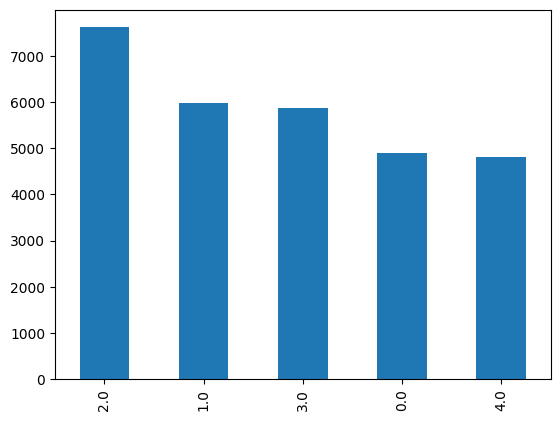

In [35]:
emotion_counts.plot(kind='bar')

<AxesSubplot:>

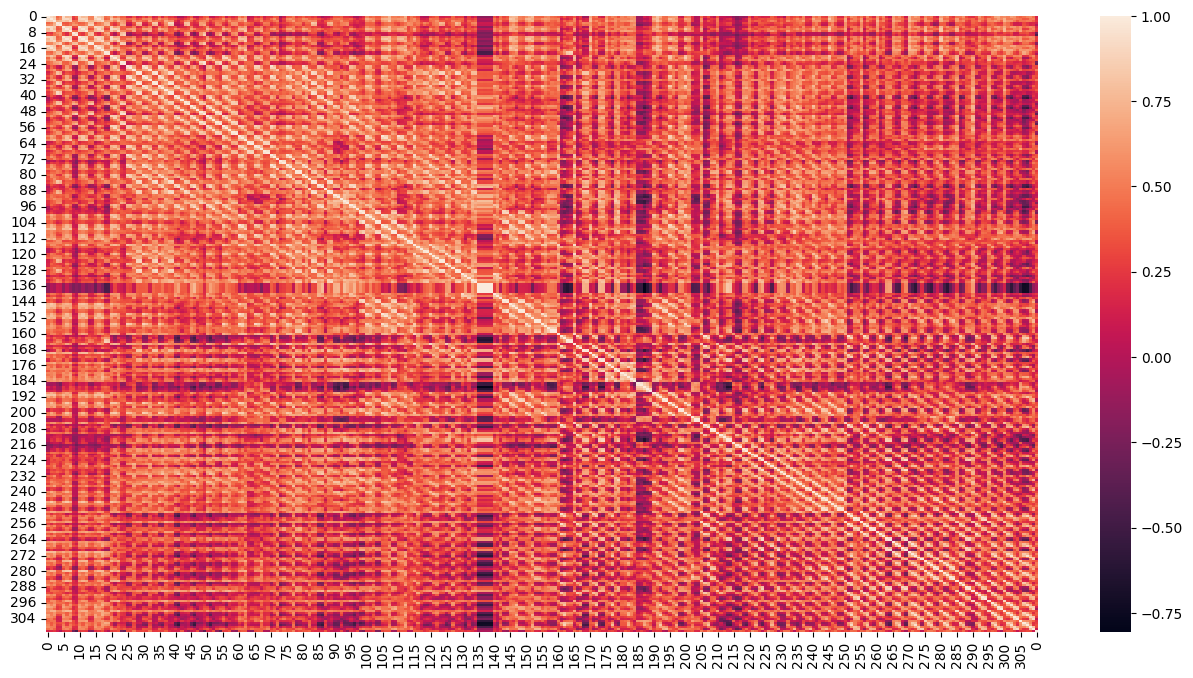

In [36]:
plt.figure(figsize=(16,8))
sns.heatmap(fulldata.corr())

In [37]:
# Compute the correlation matrix
correlation_matrix = fulldata.corr()

# Filter the correlation matrix to find attribute pairs with correlation > 0.50
high_correlations = correlation_matrix[correlation_matrix > 0.50]
high_correlations = high_correlations.mask(np.tril(np.ones(high_correlations.shape)).astype(np.bool))

# Get the attribute pairs with correlation > 0.50
high_correlation_pairs = high_correlations.unstack().sort_values(ascending=False).dropna()
high_correlation_pairs


/tmp/ipykernel_25897/1676382830.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  high_correlations = high_correlations.mask(np.tril(np.ones(high_correlations.shape)).astype(np.bool))


138  137    0.999367
     135    0.999084
139  138    0.999039
137  136    0.998976
139  135    0.998763
              ...   
299  100    0.500064
141  121    0.500043
64   8      0.500043
308  2      0.500029
235  2      0.500025
Length: 13250, dtype: float64

In [38]:
correlation_matrix = fulldata.corr()

# Filter the correlation matrix to find attribute pairs with correlation between 0.40 and 0.99, excluding perfect correlation (1)
filtered_correlations = correlation_matrix[((correlation_matrix > 0.40) & (correlation_matrix < 0.98)) | ((correlation_matrix < -0.40) & (correlation_matrix > -0.98))]
filtered_correlations = filtered_correlations.mask(np.tril(np.ones(filtered_correlations.shape)).astype(np.bool))

# Get the attribute pairs with the desired correlations
desired_correlation_pairs = filtered_correlations.unstack().sort_values(ascending=False).dropna()

# Print the attribute pairs and their correlations
#print("Attribute pairs with correlation between 0.40 and 0.99:")
#for pair, correlation in desired_correlation_pairs.iteritems():
    #attribute1, attribute2 = pair
    #print(f"{attribute1} - {attribute2}: {correlation:.2f}")

desired_correlation_pairs 

/tmp/ipykernel_25897/554330152.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filtered_correlations = filtered_correlations.mask(np.tril(np.ones(filtered_correlations.shape)).astype(np.bool))


75   70     0.979784
169  168    0.978588
84   83     0.978572
29   28     0.978420
271  266    0.977217
              ...   
187  135   -0.798656
     136   -0.800506
     139   -0.804131
     138   -0.804589
     137   -0.805320
Length: 20936, dtype: float64

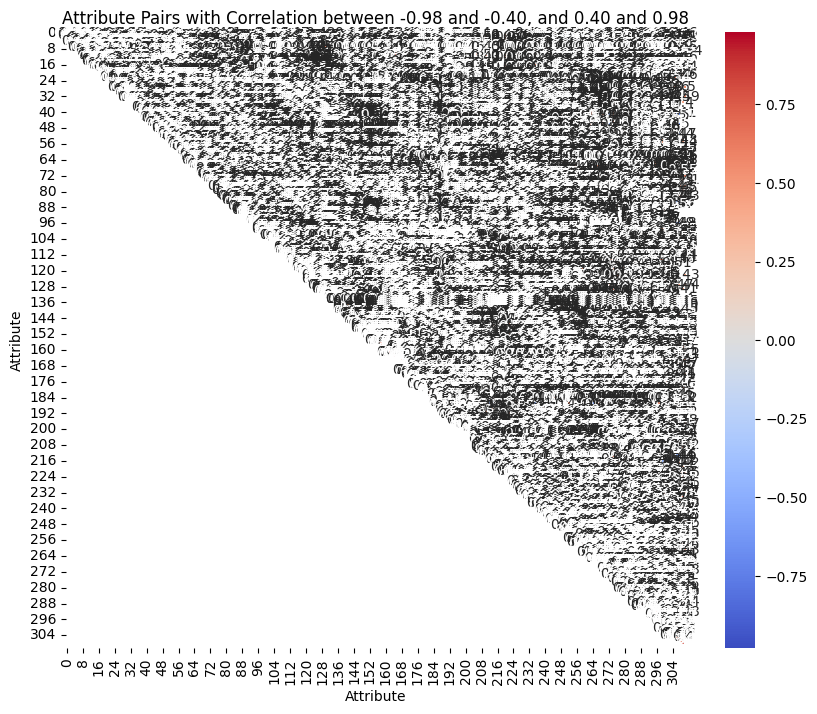

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlations, annot=True, cmap='coolwarm', vmin=-0.98, vmax=0.98)
plt.title('Attribute Pairs with Correlation between -0.98 and -0.40, and 0.40 and 0.98')
plt.xlabel('Attribute')
plt.ylabel('Attribute')
plt.show()

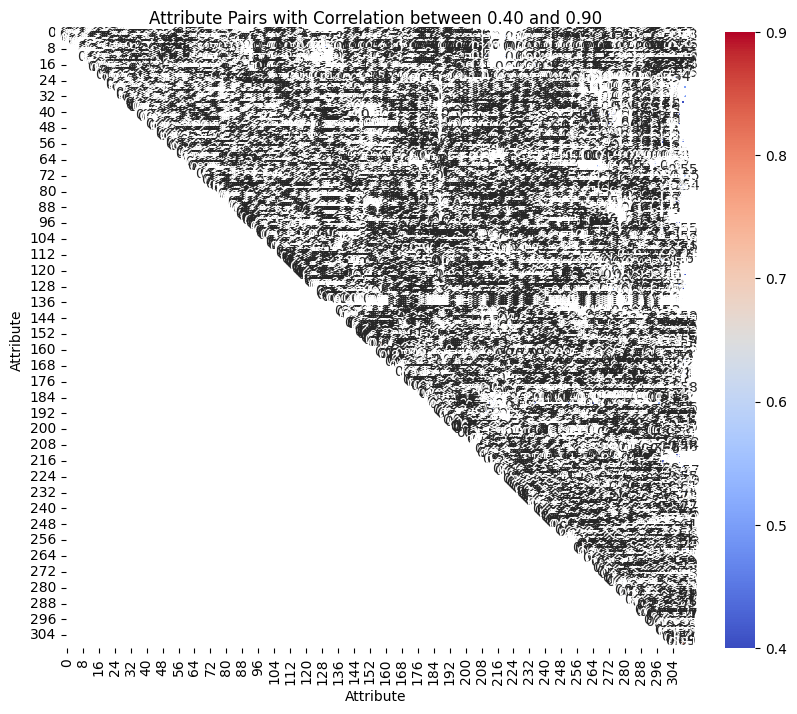

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlations, annot=True, cmap='coolwarm', vmin=0.4, vmax=0.90)
plt.title('Attribute Pairs with Correlation between 0.40 and 0.90')
plt.xlabel('Attribute')
plt.ylabel('Attribute')
plt.show()


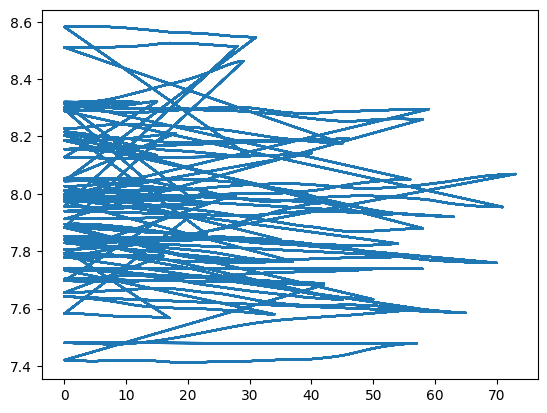

In [41]:
#line plot of a single emotion
plt.plot(fulldata[40])

In [42]:
fulldata.iloc[40 :, -1]    # column 40  

22    1.0
23    1.0
0     3.0
1     3.0
2     3.0
     ... 
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
Name: 0, Length: 29128, dtype: float64

In [43]:
fear_df = fulldata[fulldata.iloc[:, -1] == 1]
fear_df

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,0
0,10.539966,8.728960,7.567886,8.364595,8.554128,10.105816,8.476855,7.210753,7.212286,7.070585,...,7.331926,6.510147,5.435035,4.420198,8.961795,7.554606,6.647916,5.354314,4.017726,1.0
1,10.538975,8.728445,7.567612,8.364309,8.554022,10.104678,8.476401,7.210501,7.212297,7.070662,...,7.331506,6.509971,5.434931,4.420232,8.961679,7.554239,6.647825,5.354306,4.017797,1.0
2,10.536765,8.727378,7.567489,8.363710,8.554081,10.102264,8.475524,7.210345,7.212291,7.071066,...,7.330959,6.509964,5.434805,4.420261,8.961708,7.553822,6.647989,5.354458,4.017883,1.0
3,10.533401,8.725625,7.567234,8.362806,8.554374,10.098756,8.474190,7.210142,7.212044,7.071774,...,7.330317,6.509916,5.434762,4.420341,8.961884,7.553214,6.648322,5.354734,4.017978,1.0
4,10.529604,8.723575,7.566981,8.361852,8.554828,10.095072,8.473010,7.210065,7.211554,7.072757,...,7.329526,6.509850,5.434917,4.420575,8.962340,7.552392,6.648699,5.355166,4.018013,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,9.350186,7.820035,6.566803,6.589642,6.441895,9.217875,7.899119,6.502478,5.895882,5.437506,...,7.081818,6.124789,5.137238,4.206873,8.706302,7.313793,6.228076,5.036670,3.706273,1.0
47,9.347643,7.817770,6.564599,6.591423,6.443368,9.215267,7.896949,6.500231,5.894519,5.437532,...,7.081599,6.125317,5.138314,4.209197,8.707883,7.313512,6.228553,5.037576,3.707938,1.0
48,9.345545,7.815866,6.563048,6.592647,6.444379,9.213066,7.895283,6.498802,5.893395,5.437381,...,7.081041,6.126029,5.139183,4.211184,8.709358,7.313020,6.229207,5.038440,3.709422,1.0
49,9.344152,7.814177,6.561990,6.593323,6.445031,9.211590,7.893932,6.498029,5.892562,5.437182,...,7.080132,6.126799,5.139795,4.212600,8.710693,7.312147,6.229985,5.039090,3.710491,1.0


<AxesSubplot:>

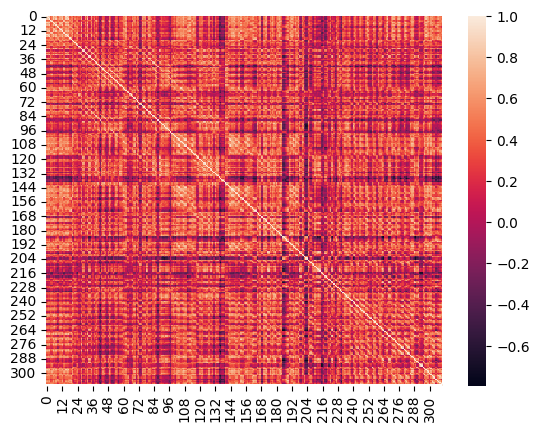

In [44]:
sns.heatmap(fear_df.corr('kendall'))

<AxesSubplot:>

/home/rigelli/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/rigelli/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


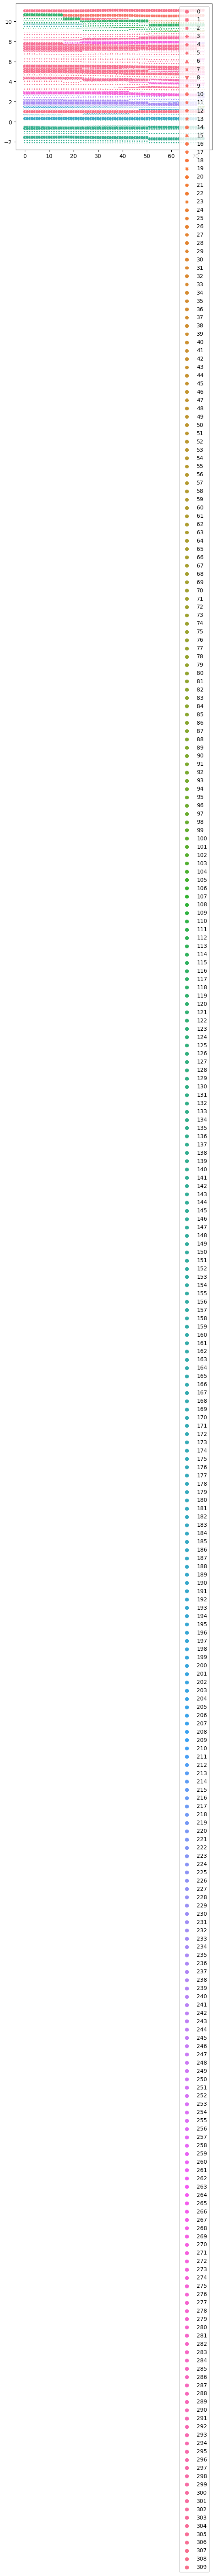

In [45]:
sns.scatterplot(data=fear_df)

In [46]:
disgust_df = fulldata[fulldata.iloc[:, -1] == 0]
disgust_df

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,0
0,10.594283,8.957158,7.707908,7.718440,8.269538,10.100397,8.581276,7.274535,7.464265,8.055277,...,7.537304,6.811627,5.733286,5.099570,8.776115,7.652402,6.734997,5.453021,4.455799,0.0
1,10.594590,8.957607,7.708134,7.718679,8.269682,10.100712,8.581953,7.274990,7.464576,8.055648,...,7.537118,6.811186,5.733414,5.099477,8.776165,7.652282,6.734570,5.452759,4.455338,0.0
2,10.595005,8.958205,7.708485,7.719397,8.270199,10.101106,8.582789,7.275520,7.465733,8.057256,...,7.536897,6.810446,5.733475,5.099412,8.775719,7.652320,6.733909,5.452194,4.454660,0.0
3,10.595102,8.958677,7.708785,7.720502,8.271035,10.101104,8.583495,7.275841,7.467517,8.060019,...,7.536346,6.809520,5.733514,5.099609,8.775016,7.652314,6.733051,5.451402,4.453948,0.0
4,10.594238,8.958663,7.709010,7.721921,8.272370,10.100157,8.583699,7.275837,7.469949,8.064055,...,7.535443,6.808479,5.733314,5.100057,8.773959,7.652191,6.732101,5.450421,4.453369,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,9.865708,8.181951,6.968030,7.457957,7.581654,9.842531,8.273131,6.920100,7.634970,8.088547,...,7.113831,6.602746,5.948172,5.670912,8.973436,7.394573,6.659146,5.869473,5.465647,0.0
40,9.873385,8.184243,6.968518,7.458047,7.581070,9.851169,8.275693,6.921697,7.637877,8.090925,...,7.114508,6.604563,5.949810,5.674434,8.973164,7.395748,6.659279,5.869647,5.467477,0.0
41,9.878899,8.185655,6.968883,7.458021,7.580267,9.857436,8.277476,6.923256,7.640097,8.092470,...,7.115406,6.605937,5.950904,5.676970,8.972556,7.396990,6.659370,5.869539,5.468438,0.0
42,9.882484,8.186410,6.969143,7.457973,7.579572,9.861518,8.278689,6.924505,7.641712,8.093218,...,7.116213,6.606916,5.951629,5.678651,8.971836,7.398021,6.659404,5.869355,5.468909,0.0


<AxesSubplot:>

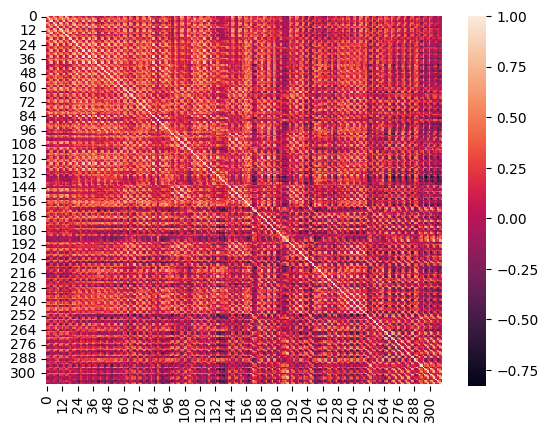

In [47]:
sns.heatmap(disgust_df.corr('kendall'))

In [48]:
sad_df = fulldata[fulldata.iloc[:, -1] == 2]
sad_df

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,0
0,10.738761,8.893803,7.583496,7.612123,7.888876,10.356290,8.604928,7.336876,7.603690,8.382521,...,7.388758,6.582909,5.283734,4.020386,8.919218,7.561660,6.733573,5.482047,4.214072,2.0
1,10.738954,8.894173,7.583376,7.611270,7.888188,10.356552,8.605159,7.337076,7.603098,8.382684,...,7.388617,6.582466,5.283837,4.020581,8.919422,7.561517,6.732913,5.482059,4.213925,2.0
2,10.738359,8.893294,7.582134,7.609240,7.886720,10.355846,8.604082,7.336444,7.602244,8.383440,...,7.388261,6.582064,5.284390,4.021213,8.919398,7.561287,6.732147,5.482293,4.213867,2.0
3,10.736964,8.891161,7.580001,7.606171,7.884541,10.354319,8.601757,7.335038,7.601183,8.384723,...,7.387722,6.581931,5.285594,4.022443,8.919290,7.561044,6.731554,5.482876,4.214198,2.0
4,10.734968,8.887925,7.577357,7.602245,7.882084,10.352490,8.598488,7.333286,7.600147,8.386577,...,7.387640,6.582371,5.287319,4.024163,8.919342,7.561162,6.731564,5.483860,4.215029,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,9.539588,7.604052,6.558068,6.634334,6.134004,9.326942,7.662477,6.427150,6.328129,5.432712,...,7.074141,6.345165,4.994946,3.302563,8.626253,7.261960,6.553156,5.130295,3.388298,2.0
28,9.537209,7.601649,6.556846,6.632383,6.132759,9.324721,7.660264,6.425441,6.326984,5.432052,...,7.075230,6.344301,4.995539,3.302768,8.624742,7.262148,6.551936,5.130642,3.388243,2.0
29,9.535466,7.599294,6.555767,6.630760,6.131656,9.323272,7.658219,6.423970,6.326076,5.431273,...,7.075781,6.343910,4.996268,3.303030,8.623293,7.261898,6.551335,5.131137,3.388356,2.0
30,9.534664,7.597399,6.554990,6.629656,6.130911,9.322613,7.656600,6.422901,6.325452,5.430560,...,7.076023,6.343878,4.996954,3.303377,8.622432,7.261573,6.551272,5.131679,3.388558,2.0


In [ ]:
sns.heatmap(sad_df.corr('kendall'))

In [ ]:
neutral_df = fulldata[fulldata.iloc[:, -1] == 3]
neutral_df

In [ ]:
sns.heatmap(neutral_df.corr('kendall'))

In [ ]:
happy_df = fulldata[fulldata.iloc[:, -1] == 4]
happy_df

In [ ]:
sns.heatmap(happy_df.corr(method='kendall'))

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = fulldata.isnull().sum()
missing_values



In [ ]:
# Display the number of missing values for each column
print(missing_values)

# Alternatively, you can check the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Display the percentage of missing values for each column
print(missing_percentage)

In [ ]:
data.isnull().sum().sort_values(ascending=False) 

# Preprocessing of data 

In [ ]:
X_train = train.drop(['target'], axis=1)
y_train = train['target']

In [ ]:
# scaling of the dataset 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
# use feature permutation in order to check the relevance of the features 

# Modelling 

## Baseline Model: SVM 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear', C=10)

# equivalent but with SGD solver
from sklearn.linear_model import SGDClassifier
svc_bis = SGDClassifier(loss='hinge', penalty='l2', alpha=1/10)

# Train the classifier on the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = svc.predict(X_test)

# Evaluate the accuracy of the classifier
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

## RNN / CNN 